In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X=df.drop(['species'],axis=1)
X_scaled=StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [6]:
y=df['species']

In [7]:
features=X_scaled.T
cov_matrix=np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [8]:
values, vectors= np.linalg.eig(cov_matrix)

In [9]:
values[:5]

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [10]:
vectors[:5]

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [11]:
explained_variances=[]
for i in range(len(values)):
    explained_variances.append((values[i]/ np.sum(values))*100)

In [12]:
print("variances of each feature",explained_variances)

variances of each feature [72.77045209380134, 23.030523267680643, 3.683831957627389, 0.5151926808906266]


Text(0.5, 0, 'Dimensions')

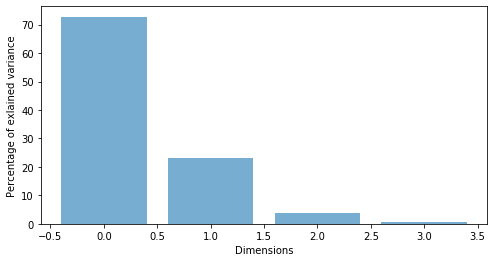

In [15]:
plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variances,alpha=0.6)
plt.ylabel('Percentage of exlained variance')
plt.xlabel('Dimensions')

In [16]:
projected_1=X_scaled.dot(vectors.T[0])
projected_2=X_scaled.dot(vectors.T[1])
res=pd.DataFrame(projected_1,columns=['PC1'])
res['PC2']=projected_2
res['Y']=y
res.head()

,PC1,PC2,Y
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


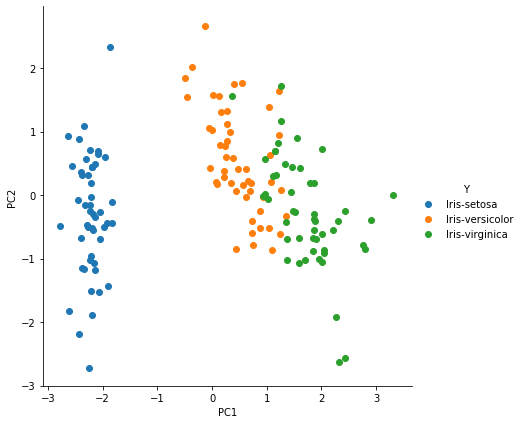

In [18]:
sns.FacetGrid(res,hue="Y",height=6).map(plt.scatter,'PC1','PC2').add_legend()


In [19]:
plt.show()